In [8]:
from torch.utils.data import DataLoader
import joblib
from loguru import logger
from torchvision.datasets import ImageFolder
import torchvision
import numpy as np

In [2]:
my_dataset = ImageFolder(root='../kaokore',transform=torchvision.transforms.ToTensor())

In [3]:
img_dataset= ImageFolder(root='../kaokore')

In [4]:
my_dl = DataLoader(my_dataset)
x = next(iter(my_dl))[0]

In [5]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
fx = resnet18(x)
fx.detach().cpu().numpy().flatten().shape

(1000,)

In [6]:
from tqdm.notebook import tqdm
embeddings_flattened=[]
for x,_ in tqdm(my_dl):
    resnet18 = models.resnet18(pretrained=True)
    fx = resnet18(x)
    embeddings_flattened.append(fx.detach().cpu().numpy().flatten())

KeyboardInterrupt: 

In [36]:
embeddings_flattened

array([[-0.71359587, -0.4896406 , -0.6346112 , ..., -0.49162462,
         1.407987  ,  1.0766134 ],
       [-0.6480294 , -0.46707076, -0.6019174 , ..., -0.62511635,
         1.2678697 ,  0.97489583],
       [-0.6760223 , -0.43515927, -0.6391045 , ..., -0.5591329 ,
         1.1385832 ,  1.0632927 ],
       ...,
       [-0.6528751 , -0.5304028 , -0.6162649 , ..., -0.5028069 ,
         1.2871561 ,  1.0438673 ],
       [-0.61737114, -0.41400194, -0.5370695 , ..., -0.48731306,
         1.2909577 ,  1.0145078 ],
       [-0.60742956, -0.52389044, -0.62912315, ..., -0.4936829 ,
         1.3962312 ,  0.9377502 ]], dtype=float32)

In [9]:
np.array(embeddings_flattened).shape

(10, 1000)

In [10]:
embeddings_flattened=np.array(embeddings_flattened)

In [33]:
from sklearn.externals import joblib
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=5, metric="cosine")
# filename = 'TEST_fitted_knn_kaokore.sav'
# joblib.dump(knn, open(filename, 'wb'))

In [39]:
from sklearn.externals import joblib
# Its important to use binary mode 
knn.fit(embeddings_flattened)
# source, destination 
joblib.dump(knn, 'KNN.pkl')                     


['KNN.pkl']

In [35]:
# load the model from disk
loaded_model = joblib.load('KNN.pkl' , mmap_mode ='r')

EOFError: Ran out of input

In [21]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
fx = resnet18(x)
fx.detach().cpu().numpy().flatten().shape

(1000,)

In [22]:
loaded_model = joblib.load(filename)
loaded_model

NearestNeighbors(metric='cosine')

In [23]:
img_test = next(iter(my_dl))[0]
img_test

tensor([[[[0.9804, 0.9843, 0.9843,  ..., 0.9294, 0.9294, 0.9137],
          [1.0000, 1.0000, 0.9961,  ..., 0.9216, 0.9216, 0.9098],
          [0.9961, 0.9882, 0.9961,  ..., 0.9137, 0.9098, 0.9176],
          ...,
          [0.9216, 0.9059, 0.9137,  ..., 0.9137, 0.9255, 0.9255],
          [0.9216, 0.9137, 0.9255,  ..., 0.9216, 0.9255, 0.9216],
          [0.9333, 0.9255, 0.9255,  ..., 0.9333, 0.9333, 0.9255]],

         [[0.7255, 0.7294, 0.7098,  ..., 0.9020, 0.9020, 0.8941],
          [0.7176, 0.7176, 0.7059,  ..., 0.9059, 0.9059, 0.8980],
          [0.6706, 0.6667, 0.6902,  ..., 0.9020, 0.8980, 0.8980],
          ...,
          [0.9137, 0.9059, 0.9137,  ..., 0.9059, 0.9059, 0.9059],
          [0.9059, 0.9020, 0.9176,  ..., 0.9059, 0.8980, 0.8941],
          [0.9059, 0.9098, 0.9098,  ..., 0.8980, 0.9059, 0.8980]],

         [[0.6000, 0.6039, 0.5765,  ..., 0.8706, 0.8706, 0.8784],
          [0.5529, 0.5647, 0.5686,  ..., 0.8706, 0.8706, 0.8784],
          [0.4980, 0.5098, 0.5490,  ..., 0

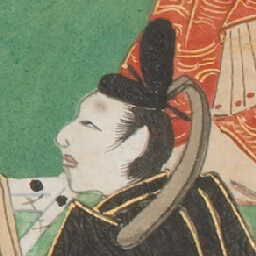

In [24]:
img_dataset[99][0]

In [25]:
test_out = fx.detach().numpy().flatten()
# test_out

In [26]:

_, top_indices = loaded_model.kneighbors([test_out]) # find k nearest train neighbours
top_indices=top_indices.flatten()

NotFittedError: This NearestNeighbors instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [187]:
Image

<module 'PIL.Image' from '/Users/simon/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py'>

In [185]:
loader

Compose(
    Scale(size=256, interpolation=PIL.Image.BILINEAR)
    ToTensor()
)

In [ ]:
test_img

In [181]:
test_out = resnet18(test_img).detach().numpy().flatten()
_, top_indices = knn.kneighbors([test_out]) # find k nearest train neighbours
top_indices=top_indices.flatten()
top_indices

array([246, 157, 146, 205,  84])

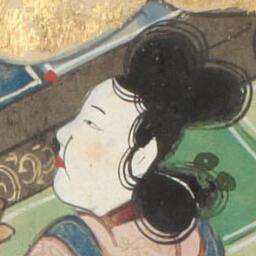

In [182]:
img_dataset[246][0]

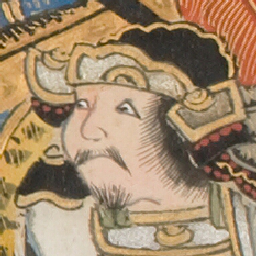

In [183]:
img_dataset[157][0]

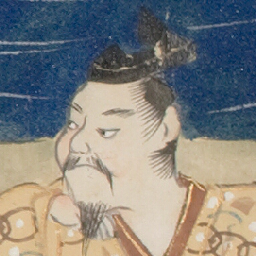

In [184]:
img_dataset[146][0]

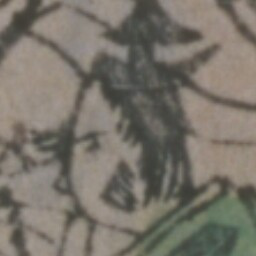

In [159]:
img_dataset[85][0]

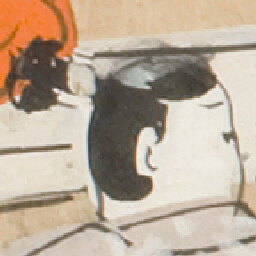

In [160]:
img_dataset[16][0]

In [186]:
PATH_TO_IMG='/Users/simon/Desktop/63212182948__89FADCD6-CDD0-4821-A046-9C3237E9732B.jpeg'
import torchvision.transforms as transforms
imsize = 256
loader = transforms.Compose([transforms.Scale(imsize), transforms.ToTensor()])

def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image #.cuda()  #assumes that you're using GPU

test_img = image_loader(PATH_TO_IMG)

test_img.shape

torch.Size([1, 3, 256, 341])

In [170]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=5, metric="cosine")
knn.fit(embeddings_flattened)

NearestNeighbors(metric='cosine')

In [88]:
from sklearn.externals import joblib

filename = 'TEST_fitted_knn_kaokore.sav'
joblib.dump(knn, open(filename, 'wb'))